Ejercicio de Regresión Lineal Simple
Costo médico Activos de Datos Personales Pronóstico de seguros mediante regresión lineal Acerca de Dataset

Contexto
Machine Learning with R by Brett Lantz es un libro que proporciona una introducción al aprendizaje automático utilizando R. Por lo que puedo decir, Packt Publishing no pone a disposición de sus conjuntos de datos en línea a menos que compre el libro y cree una cuenta de usuario que puede ser un problema si usted está comprobando el libro de la biblioteca o tomando prestado el libro de un amigo. Todos estos conjuntos de datos son de dominio público, pero simplemente necesitaban algo de limpieza y codificación para que coincidiera con el formato del libro. Contenido

Columnas
edad: edad del beneficiario principal

sexo: contratista de seguros género, mujer, hombre

bmi: índice de masa corporal, que proporciona una comprensión del cuerpo, pesos que son relativamente altos o bajos en relación con la altura, índice objetivo del peso corporal (kg / m 2) utilizando la relación de altura/peso, idealmente de 18,5 a 24,9

niños: Número de niños cubiertos por el seguro de salud / Número de dependientes

fumador: Fumar

región: la zona residencial del beneficiario en EE.UU., noreste, sureste, suroeste, noroeste.

Cargos: Costos médicos individuales facturados por seguro médico



### Paso 1: Importar las librerias

In [2]:
# Libreria para operaciones matemáticas/estadísticas
import numpy as np
# Libreria para manejo de datos
import pandas as pd
# Libreria para gráficas 2D
import matplotlib.pyplot as plt
# Libreria para gráficas 3D
import seaborn as sb
# Libreria para la transformación de la data
from sklearn.preprocessing import LabelEncoder
# Liberia para la normalización de los datos
from sklearn.preprocessing import normalize
# Libreria para separar la data en entrenamiento y pruebas del modelo
from sklearn.model_selection import train_test_split
# Libreria para el algoritmo de machine learning (Árbol de Decisión para Regresión)
from sklearn.tree import DecisionTreeRegressor
# Libreria para las metricas
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### Paso 2: Cargue de la data

In [6]:
# Se carga la data en un DataFrame
data = pd.read_csv("insurance.csv")

data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Paso 3: Preprocesamiento

In [8]:
# Identificar valores NaN
print("Columna    NaN")
print(data.isnull().sum())

Columna    NaN
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [13]:
# Se genera la transformación de los datos
le = LabelEncoder()

data['genero'] = le.fit_transform( data['sex'])
data['fumador'] = le.fit_transform( data['smoker'])
data['ciudad'] = le.fit_transform( data['region'])

data

,age,sex,bmi,children,smoker,region,charges,genero,fumador,ciudad
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,2
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,3


In [15]:
# Se genera un nuevo DataFrame con la data numerica para el modelo de Regresión
data_new = pd.concat([ data['age'], data['bmi'], data['children'], data['charges'], data['genero'], data['fumador'], data['ciudad'] ], axis=1)

data_new

,age,bmi,children,charges,genero,fumador,ciudad
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1
1334,18,31.920,0,2205.98080,0,0,0
1335,18,36.850,0,1629.83350,0,0,2
1336,21,25.800,0,2007.94500,0,0,3


In [17]:
# Se genera las estadísticas de los datos
data_new.describe()

,age,bmi,children,charges,genero,fumador,ciudad
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,1.515695
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,1.104885
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,1.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,2.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


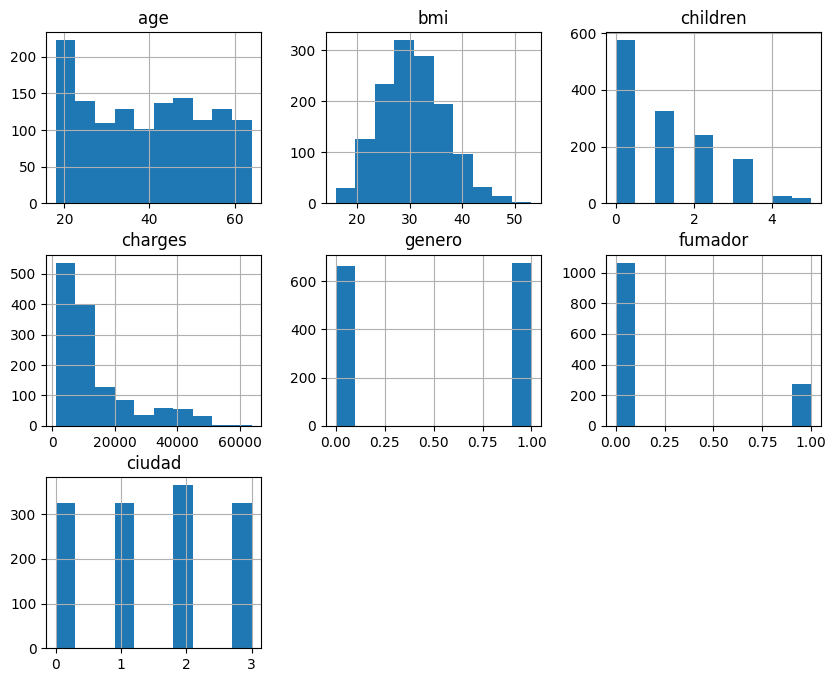

In [21]:
# Se genera la gráfica de histograma, para ver ls distribución de los datos
data_new.hist()
plt.rcParams['figure.figsize'] = (10, 8)
plt.show()

In [35]:
# Se genera la normalización
data_normalize = normalize(data_new)

data_normalize

array([[1.12526190e-03, 1.65235827e-03, 0.00000000e+00, ...,
        0.00000000e+00, 5.92243106e-05, 1.77672932e-04],
       [1.04288680e-02, 1.95657151e-02, 5.79381554e-04, ...,
        5.79381554e-04, 0.00000000e+00, 1.15876311e-03],
       [6.29259576e-03, 7.41627357e-03, 6.74206688e-04, ...,
        2.24735563e-04, 0.00000000e+00, 4.49471125e-04],
       ...,
       [1.10405699e-02, 2.26025000e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.22672999e-03],
       [1.04570071e-02, 1.28471802e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.49385816e-03],
       [2.09323914e-03, 9.97548554e-04, 0.00000000e+00, ...,
        0.00000000e+00, 3.43153957e-05, 3.43153957e-05]])

In [37]:
# Se convierte la data a un DataFrame
data_normalize = pd.DataFrame(data_normalize, columns = data_new.columns)

data_normalize

,age,bmi,children,charges,genero,fumador,ciudad
0,0.001125,0.001652,0.000000,0.999998,0.000000,0.000059,0.000178
1,0.010429,0.019566,0.000579,0.999753,0.000579,0.000000,0.001159
2,0.006293,0.007416,0.000674,0.999952,0.000225,0.000000,0.000449
3,0.001501,0.001033,0.000000,0.999998,0.000045,0.000000,0.000045
4,0.008275,0.007468,0.000000,0.999938,0.000259,0.000000,0.000259
...,...,...,...,...,...,...,...
1333,0.004717,0.002922,0.000283,0.999985,0.000094,0.000000,0.000094
1334,0.008159,0.014468,0.000000,0.999862,0.000000,0.000000,0.000000
1335,0.011041,0.022602,0.000000,0.999683,0.000000,0.000000,0.001227
1336,0.010457,0.012847,0.000000,0.999862,0.000000,0.000000,0.001494


### Paso 4: Identificación de la variable independiente (X) y dependiente (y) a partir de las correlaciones de: Pearson, Spearman, Kendall

<Axes: >

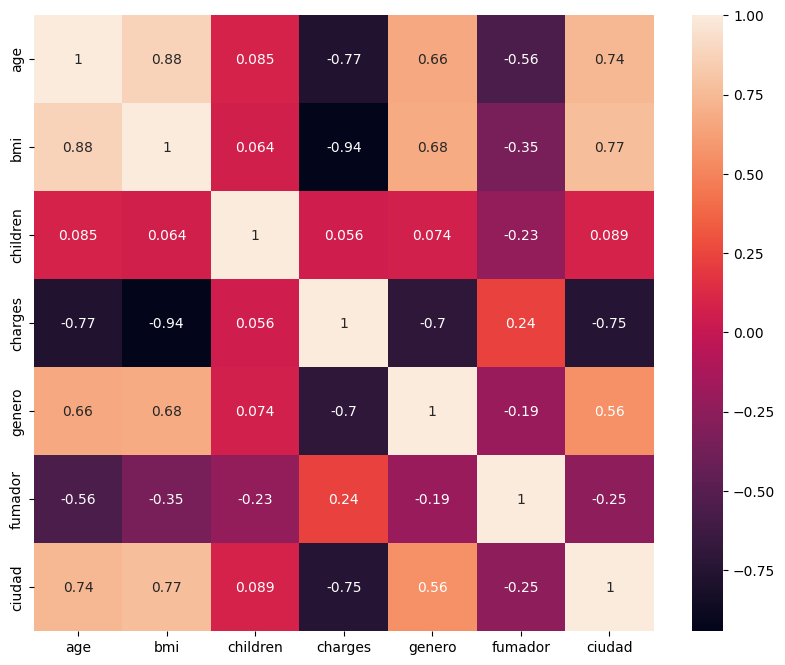

In [38]:
# Pearson
matriz = data_normalize.corr(method='pearson')

# Mapa de calor
sb.heatmap(matriz, annot=True)

### Paso 5: Separar los datos de entrenamiento y de pruebas

In [39]:
features = ['bmi']
target = ['charges']

# Se define la variable independiente
X = data_normalize[features]
# Se define la variable dependiente
y = data_normalize[target]

# Se genera la separación de los datos (80% para entrenamiento y 20% para pruebas)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

### Paso 6: Generar la predicción (Árbol de Decisión para Regresión)

In [40]:
# Se define el algoritmo para la predicción
dtr = DecisionTreeRegressor()

# Entrenamiento del modelo
dtr.fit(X_train, y_train)

# Se genera la predicción
prediction = dtr.predict(X_test)

# Se imprimen las métricas de evaluación del modelo
print(f" R2: {r2_score(y_test, prediction):.3}")
print(f" MAE: {mean_absolute_error(y_test, prediction):.3}")
print(f" MSE: {mean_squared_error(y_test, prediction):.3}")

 R2: 0.981
 MAE: 6.13e-06
 MSE: 1.44e-10


### Paso 7: Gráfica de la predicción

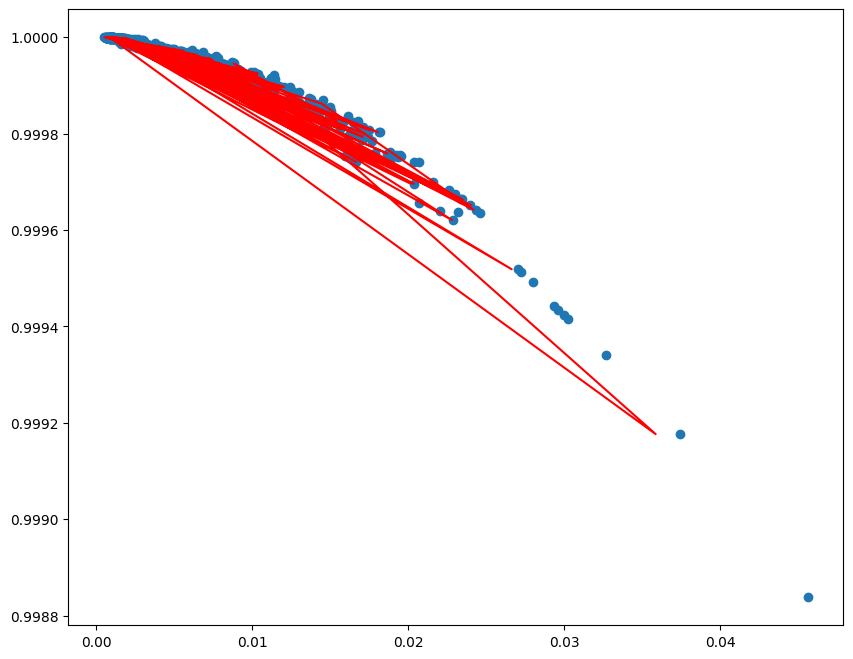

In [44]:
plt.scatter(X_train['bmi'], y_train['charges'])
plt.plot(X_test, prediction, color='red')
plt.show()

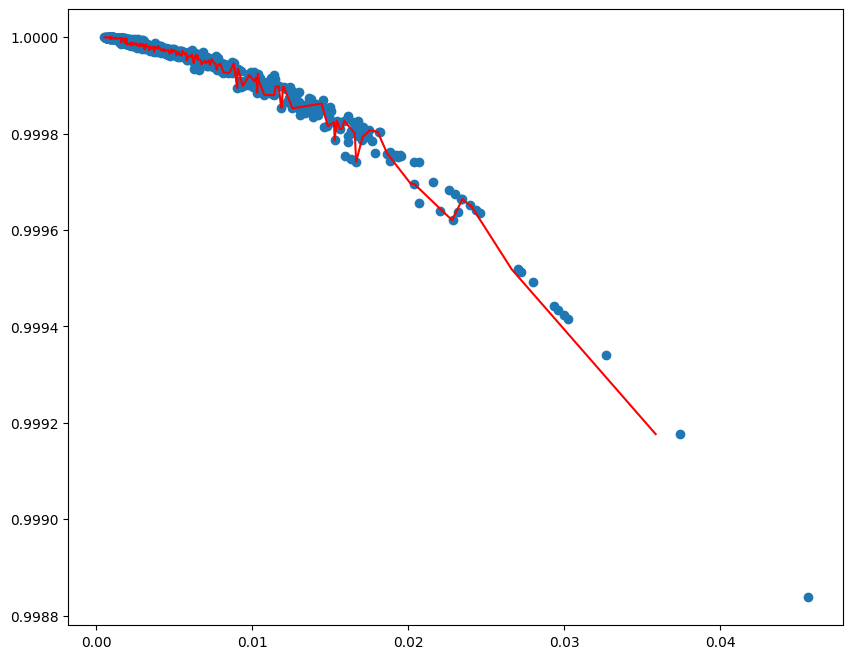

In [45]:
# Ordenar X_test y las predicciones según X_test
sorted_idx = X_test['bmi'].argsort()
X_test_sorted = X_test.iloc[sorted_idx]
predict_sorted = prediction[sorted_idx]

plt.scatter(X_train['bmi'], y_train['charges'])
plt.plot(X_test_sorted, predict_sorted, color='red')
plt.show()

### Paso 8: Nueva predicción

In [53]:
# Definir la data para pasarle al modelo de predicción
data_predecir = pd.DataFrame({'bmi': [0.019566]})

nueva_prediccion = dtr.predict(data_predecir)

print("Valor de Cargo Original: 0.999998")
print(f"Valor de Cargo de la predicción: {nueva_prediccion}")

Valor de Cargo Original: 0.999998
Valor de Cargo de la predicción: [0.99975317]


### Hasta aquí va el ACA1

### **--------------------------------------------------------------------------**

### Regresión lineal múltiple

In [70]:
# Se seleccionan las variables para la predicción
features = ['bmi', 'age']
target = ['charges']
# X1, X2
X = data_normalize[features]
# y
y = data_normalize[target]

# Se separa la data para el entrenamiento y las pruebas del modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [71]:
#### Se genera la predicción
# Se define el algoritmo a utilizar en la predicción
dtrm = DecisionTreeRegressor()

# Se entrena em modelo
dtrm.fit(X_train, y_train)

predict = dtrm.predict(X_test)

# Se imprimen las métricas de evaluación del modelo
print(f" R2: {r2_score(y_test, predict):.3}")
print(f" MAE: {mean_absolute_error(y_test, predict):.3}")
print(f" MSE: {mean_squared_error(y_test, predict):.3}")

 R2: 0.996
 MAE: 1.74e-06
 MSE: 2.84e-11


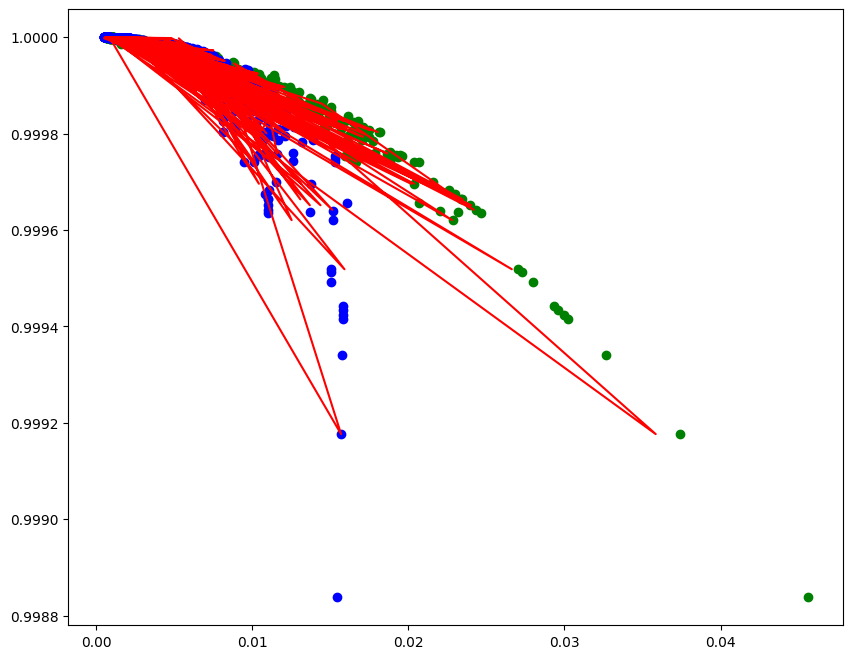

In [73]:
plt.scatter(X_train['bmi'], y_train['charges'], color="green")
plt.scatter(X_train['age'], y_train['charges'], color="blue")
plt.plot(X_test, prediction, color='red')
plt.show()

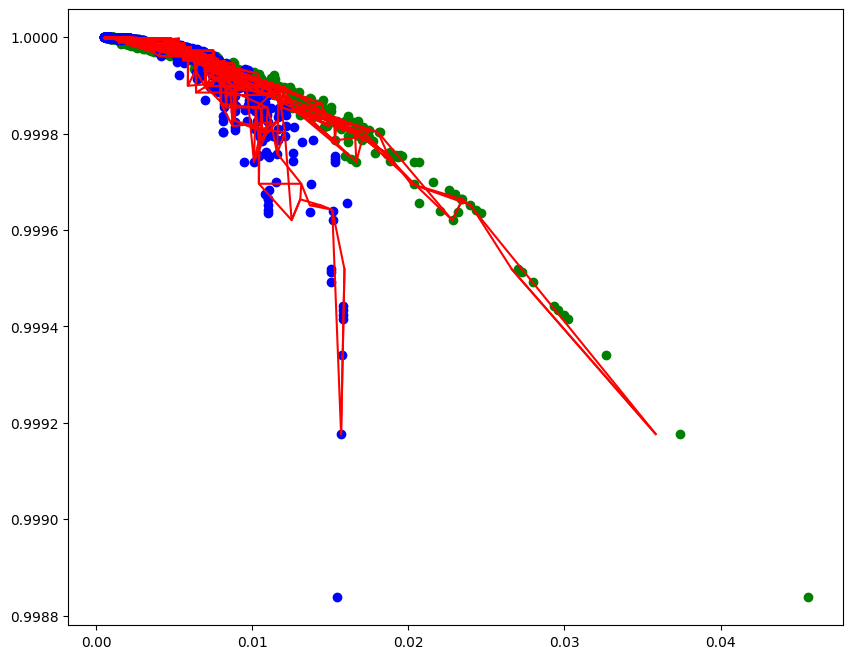

In [75]:
# Ordenar X_test y las predicciones según X_test
sorted_idx = X_test['bmi'].argsort()
X_test_sorted = X_test.iloc[sorted_idx]
predict_sorted = prediction[sorted_idx]

sorted_idx2 = X_test['age'].argsort()
X_test_sorted2 = X_test.iloc[sorted_idx2]
predict_sorted2 = prediction[sorted_idx2]

plt.scatter(X_train['bmi'], y_train['charges'], color="green")
plt.scatter(X_train['age'], y_train['charges'], color="blue")
plt.plot(X_test_sorted, predict_sorted, color='red')
plt.plot(X_test_sorted2, predict_sorted2, color='red')
plt.show()